# games

In [1]:
annotated_url = "https://gameknot.com/list_annotated.pl?u=all"
number_of_pages = 316

In [2]:
import pickle

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
BASE_PATH = '/content/drive/MyDrive/NLP/Data/'

In [5]:
game_urls = pickle.load(open(BASE_PATH+"saved_game_urls.p","rb"))

In [6]:
len(game_urls)

12636

In [7]:
len(list(set(game_urls)))

12636

# load

In [8]:
games_data_path = BASE_PATH + 'NEW/games_data'
NUMER_OF_DATA_DIRS = 12

In [9]:
paths = [f'{games_data_path}{i+1}.p' for i in range(NUMER_OF_DATA_DIRS)]

In [14]:
data = []
for path in paths:
    with open(path, 'rb') as file:
        raw_data = pickle.load(file)
    data.extend(raw_data)

# samples


In [15]:
len(data)

349015

In [16]:
len(list(set(data)))

348868

In [24]:
total = len(list(set(data)))

In [26]:
moves_count, legal_moves_count, attackers_count, attacks_count, len_comment = [], [], [], [], []

for data_object in data:
  (FEN, moves, last_move_desc, legal_moves, attackers_list, attacks_list, comment) = data_object

  moves_ = moves.count(',') + 1 if moves != '' else 0
  moves_count.append(moves_)

  legal_moves_ = legal_moves.count(',') + 1 if legal_moves != '' else 0
  legal_moves_count.append(legal_moves_) 

  attackers = attackers_list.count(',') + 1 if attackers_list != '' else 0
  attackers_count.append(attackers) 

  attacks = attacks_list.count(',') + 1 if attacks_list != '' else 0
  attacks_count.append(attacks) 
  
  len_comment.append(len(comment.split(' ')))

# moves

In [27]:
import collections
import matplotlib.pyplot as plt

In [28]:
ctr_moves = collections.Counter(moves_count)

In [29]:
ctr_moves

Counter({0: 4661,
         1: 200480,
         2: 59968,
         3: 27604,
         4: 19430,
         5: 10114,
         6: 7594,
         7: 4352,
         8: 3516,
         9: 2203,
         10: 1865,
         11: 1199,
         12: 1032,
         13: 749,
         14: 665,
         15: 499,
         16: 463,
         17: 319,
         18: 290,
         19: 244,
         20: 212,
         21: 172,
         22: 157,
         23: 117,
         24: 93,
         25: 98,
         26: 80,
         27: 73,
         28: 72,
         29: 55,
         30: 55,
         31: 45,
         32: 43,
         33: 45,
         34: 29,
         35: 19,
         36: 29,
         37: 21,
         38: 21,
         39: 20,
         40: 22,
         41: 19,
         42: 7,
         43: 17,
         44: 16,
         45: 10,
         46: 15,
         47: 14,
         48: 5,
         49: 11,
         50: 8,
         51: 9,
         52: 5,
         53: 7,
         54: 12,
         55: 12,
         56: 13,
    

(array([  4661.,      0., 200480.,      0.,  59968.,      0.,  27604.,
             0.,  19430.,  10114.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

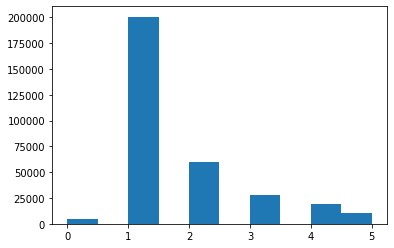

In [30]:
plt.hist([l for l in moves_count if l<6])

# legal moves


In [48]:
ctr_legal_moves = collections.Counter(legal_moves_count)

In [49]:
ctr_legal_moves 

Counter({0: 4071,
         1: 3990,
         2: 5497,
         3: 5459,
         4: 4757,
         5: 3569,
         6: 2527,
         7: 1681,
         8: 1234,
         9: 962,
         10: 934,
         11: 1067,
         12: 1216,
         13: 1485,
         14: 1607,
         15: 1876,
         16: 2253,
         17: 2451,
         18: 2632,
         19: 2989,
         20: 9170,
         21: 4193,
         22: 5230,
         23: 4915,
         24: 5121,
         25: 6448,
         26: 7509,
         27: 10176,
         28: 11219,
         29: 13109,
         30: 15579,
         31: 13710,
         32: 14467,
         33: 15042,
         34: 14565,
         35: 14349,
         36: 14110,
         37: 13835,
         38: 13570,
         39: 12607,
         40: 11233,
         41: 10250,
         42: 9487,
         43: 8472,
         44: 7236,
         45: 6167,
         46: 5228,
         47: 4436,
         48: 3436,
         49: 2864,
         50: 2262,
         51: 1783,
         

(array([3.27850e+04, 1.14000e+04, 4.31490e+04, 1.00811e+05, 1.14006e+05,
        4.01010e+04, 6.47100e+03, 2.77000e+02, 1.20000e+01, 3.00000e+00]),
 array([ 0. ,  8.5, 17. , 25.5, 34. , 42.5, 51. , 59.5, 68. , 76.5, 85. ]),
 <a list of 10 Patch objects>)

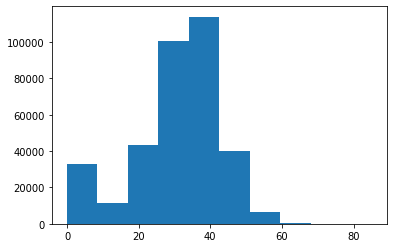

In [50]:
plt.hist(legal_moves_count)

# attakers

In [51]:
ctr_attackers = collections.Counter(attackers_count) # attacks_count

In [52]:
ctr_attackers

Counter({0: 119489, 1: 127362, 2: 78636, 3: 20679, 4: 2804, 5: 42, 6: 3})

(array([1.19489e+05, 1.27362e+05, 0.00000e+00, 7.86360e+04, 0.00000e+00,
        2.06790e+04, 2.80400e+03, 0.00000e+00, 4.20000e+01, 3.00000e+00]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

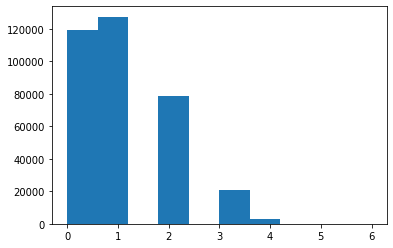

In [53]:
plt.hist(attackers_count)

# attacks


In [54]:
ctr_attacks = collections.Counter(attacks_count) 

In [55]:
ctr_attacks

Counter({1: 18147,
         2: 81257,
         3: 4041,
         4: 11568,
         5: 21455,
         6: 27859,
         7: 19303,
         8: 67960,
         9: 17748,
         10: 14680,
         11: 10831,
         12: 8930,
         13: 8547,
         14: 8197,
         15: 5371,
         16: 5114,
         17: 4566,
         18: 4042,
         19: 3201,
         20: 2416,
         21: 1689,
         22: 992,
         23: 638,
         24: 273,
         25: 131,
         26: 37,
         27: 22})

(array([103445.,  60882.,  87263.,  43259.,  17477.,  18682.,  11809.,
          4105.,   1903.,    190.]),
 array([ 1. ,  3.6,  6.2,  8.8, 11.4, 14. , 16.6, 19.2, 21.8, 24.4, 27. ]),
 <a list of 10 Patch objects>)

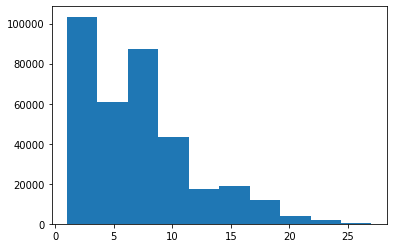

In [56]:
plt.hist(attacks_count)

# comment

In [31]:
sum(len_comment)/total

20.707190112019447

In [32]:
ctr_comment = collections.Counter(len_comment)

In [ ]:
ctr_comment

(array([200652.,  79946.,  32837.,  15168.,   7476.,   4475.,   2732.,
          1717.,   1098.,    777.]),
 array([  1. ,  15.8,  30.6,  45.4,  60.2,  75. ,  89.8, 104.6, 119.4,
        134.2, 149. ]),
 <a list of 10 Patch objects>)

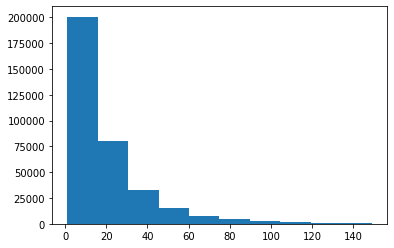

In [34]:
plt.hist([l for l in len_comment if l<150])

# words

In [35]:
word_frequencies = collections.defaultdict(int)

In [36]:
for data_object in data:
  (FEN, moves, last_move_desc, legal_moves, attackers_list, attacks_list, comment) = data_object
  words = comment.split(' ')
  for word in words:
    word_frequencies[word]+=1

In [37]:
len(word_frequencies.keys())

236981

In [38]:
freqThreshold = 3 
rareWords = []

In [39]:
for word,freq in word_frequencies.items():
    if freq>freqThreshold:
      pass
    else:
      rareWords.append(word)

In [40]:
len(rareWords)

196452

In [41]:
rareWords

['pawn........',
 '...pressing',
 'book).',
 'bxbf5',
 'overloaded.\n\n28...',
 'relax)',
 'take:\n\n32...',
 'draw.\n\n32...',
 'endgame.\n\nin',
 'mas.',
 'cosï¿½,',
 'brutta.',
 'mortale,',
 'perï¿½,',
 'sï¿½',
 '"cedo',
 'tentazione"',
 '¡toma',
 'cxh7',
 'spider',
 'hole.\n',
 'contender,',
 'ncd7,',
 'rights...but',
 'not),',
 'typified',
 'dory',
 'r.j.',
 'forsake',
 'enforcement',
 'instrument',
 'dutch-like',
 'peculiarity',
 'formations,',
 'keep?',
 '21.bxb6?',
 '23.nxh2',
 'nxf2#!',
 '21.g3,',
 '21...nxg3',
 '(22.bxa6',
 '22...rxg3',
 '23.fxg3',
 'nxf5?',
 'on...?',
 '22.nhxf5',
 'upshot',
 '8...nfd7,',
 '8...nbd7,',
 '9.e5.',
 '...nc5?',
 '"killing',
 'plumb',
 'rewarded.',
 '(pga)',
 '(deeper',
 'needed).',
 'missed.........',
 'flexivel',
 'escolher',
 'clara.\n',
 'diagram.',
 '19...bc2+,',
 '19...bd3',
 '19...qc2+.',
 'origianlly',
 'non-aggressive,',
 'feel...',
 'non-normal',
 'miscelanea',
 'variado',
 'constantemente',
 'inesperadas',
 'bombardeo',
 'logrando',
 '